### **CLUSTERING - KNN & PCA**

Problem 14

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
auto = pd.read_csv('/content/drive/MyDrive/Auto.csv')

a - creating a binary variable "mpg01" based on the median of "mpg"


In [ ]:
mpg_median = auto['mpg'].median()
auto['mpg01'] = (auto['mpg'] > mpg_median).astype(int)

b- Exploring the data graphically

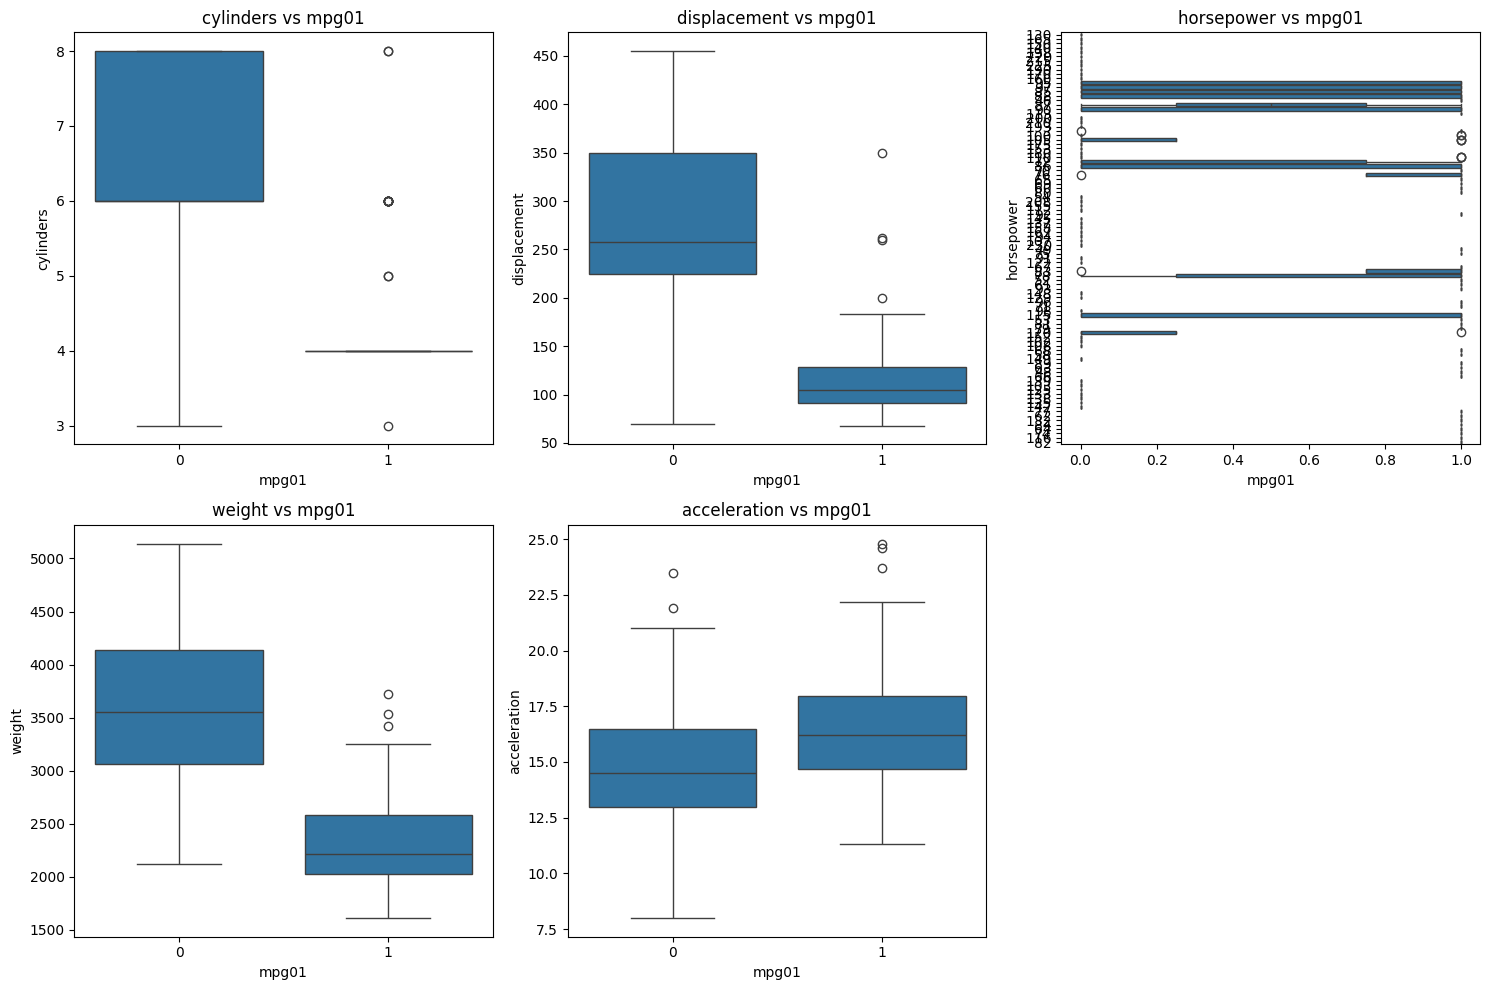

In [ ]:
plt.figure(figsize=(15, 10))
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='mpg01', y=feature, data=auto)
    plt.title(f'{feature} vs mpg01')
plt.tight_layout()
plt.show()

c- Splitting the data into training and test sets


In [ ]:
X = auto[['cylinders', 'displacement', 'horsepower', 'weight']].apply(pd.to_numeric, errors='coerce').dropna()
y = auto.loc[X.index, 'mpg01']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

h- Performing KNN on the training data

In [ ]:
test_errors = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_pred)
    test_errors.append(test_error)

Plotting test errors against K values

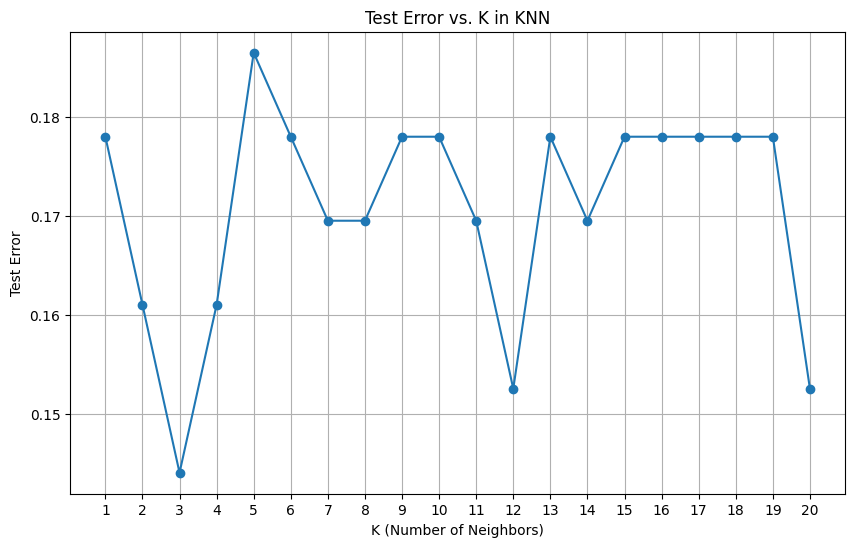

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_errors, marker='o')
plt.title('Test Error vs. K in KNN')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Test Error')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Run PCA (without scaling)

In [ ]:
X_pca = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']].apply(pd.to_numeric, errors='coerce').dropna()
pca = PCA()
pca.fit(X_pca)
explained_variance_no_scaling = pca.explained_variance_ratio_


Run PCA (with scaling)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)
pca_scaled = PCA()
pca_scaled.fit(X_scaled)
explained_variance_scaled = pca_scaled.explained_variance_ratio_


Comparison between the two PCA

In [ ]:
pca_comparison = pd.DataFrame({
    'PCA without Scaling': explained_variance_no_scaling,
    'PCA with Scaling': explained_variance_scaled
})

print(pca_comparison)

   PCA without Scaling  PCA with Scaling
0         9.975787e-01          0.814372
1         2.061651e-03          0.138772
2         3.552739e-04          0.026699
3         3.956431e-06          0.012854
4         3.727475e-07          0.007303
